In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EDA/DMart.csv')

In [ ]:
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits


In [ ]:
df.shape

(5189, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


In [ ]:
df['Quantity']

0       500 gm
1       100 gm
2       200 gm
3       500 gm
4         1 kg
         ...  
5184    1 Book
5185    1 Book
5186    1 Book
5187    1 Book
5188       1 U
Name: Quantity, Length: 5189, dtype: object

In [ ]:
#df['Quantity'] = df['Quantity'].str.replace(r'\s\w+$', '')

In [ ]:
df['Quantity']

0       500 gm
1       100 gm
2       200 gm
3       500 gm
4         1 kg
         ...  
5184    1 Book
5185    1 Book
5186    1 Book
5187    1 Book
5188       1 U
Name: Quantity, Length: 5189, dtype: object

In [ ]:
df.isnull().sum()

Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity             1
Description          2
BreadCrumbs          3
dtype: int64

In [ ]:
df.head(3)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits


In [ ]:
print('% of misiing values in each column:- ')
(df.isnull().sum()/(len(df)))*100

% of misiing values in each column:- 


Name               0.019272
Brand              7.708614
Price              0.019272
DiscountedPrice    0.019272
Category           0.057815
SubCategory        0.057815
Quantity           0.019272
Description        0.038543
BreadCrumbs        0.057815
dtype: float64

the brands column has the max amount of missing values

In [ ]:
df['percentage discount'] = ((df['Price'] - df['DiscountedPrice'])/df['Price'])*100

In [ ]:
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,percentage discount
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits,27.050998
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits,22.018349
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits,13.366337
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits,41.736227
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits,57.456423


**lets play with the percentage discount column **





In [ ]:
summary_stats = df['percentage discount'].describe()
print(summary_stats)

count    5187.000000
mean       26.388023
std        15.181187
min         0.000000
25%        14.137931
50%        22.292994
75%        35.595150
max        98.000000
Name: percentage discount, dtype: float64


Text(0.5, 1.0, 'Histogram of percentage discount')

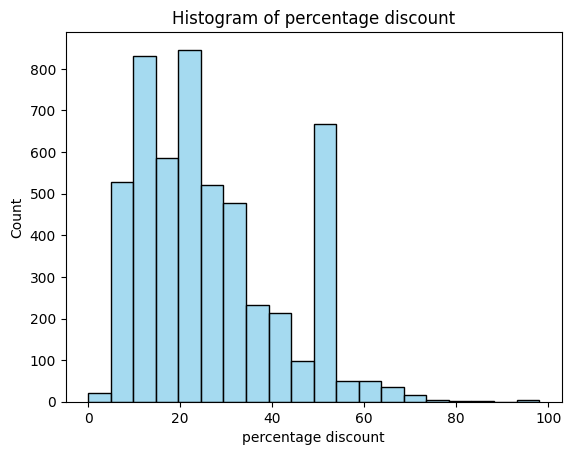

In [ ]:
sns.histplot(df['percentage discount'], bins=20, color='skyblue')
plt.title('Histogram of percentage discount')

Text(0.5, 1.0, 'box plot of percentage discount column')

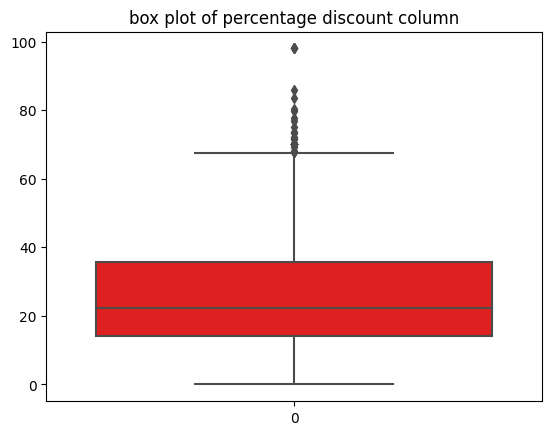

In [ ]:
#lets create a box plot to see the outliers
sns.boxplot(df['percentage discount'], color='red')
plt.title('box plot of percentage discount column')

<Axes: >

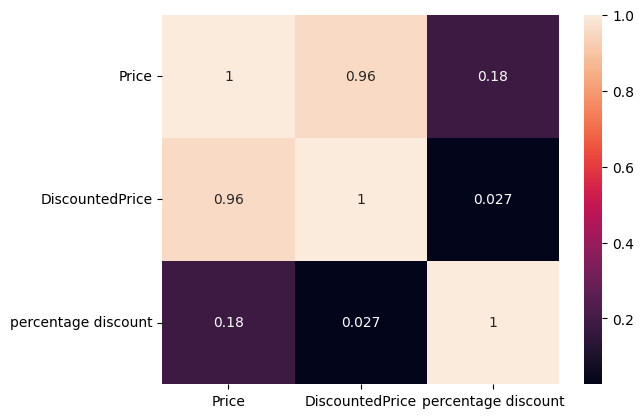

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)

In [ ]:
df.Category.unique()

array(['Grocery', 'Personal Care', 'Packaged Food', 'DMart Grocery',
       'Dairy & Beverages', 'Fruits & Vegetables', 'Home & Kitchen',
       'Specials', 'Kitchen Aprons', 'Appliances', 'Wonderchef',
       'Water Purifiers & Accessories', 'Tableware', 'Butterfly', nan,
       'Joyo Plastics', 'Geep', 'Zebronics', 'Beauty & Cosmetics',
       'Syska', 'Pigeon', 'Clothing & Accessories', 'School Supplies',
       'Backpacks', 'Computer Accessories', 'Plant Container',
       'Motorbike Helmets', 'Smartwatches', 'Raincoat', 'Baby & Kids'],
      dtype=object)

In [ ]:
df.Category.nunique()

29

In [ ]:
df.head(3)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,percentage discount
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits,27.050998
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits,22.018349
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits,13.366337


In [ ]:
df.SubCategory.nunique()

86

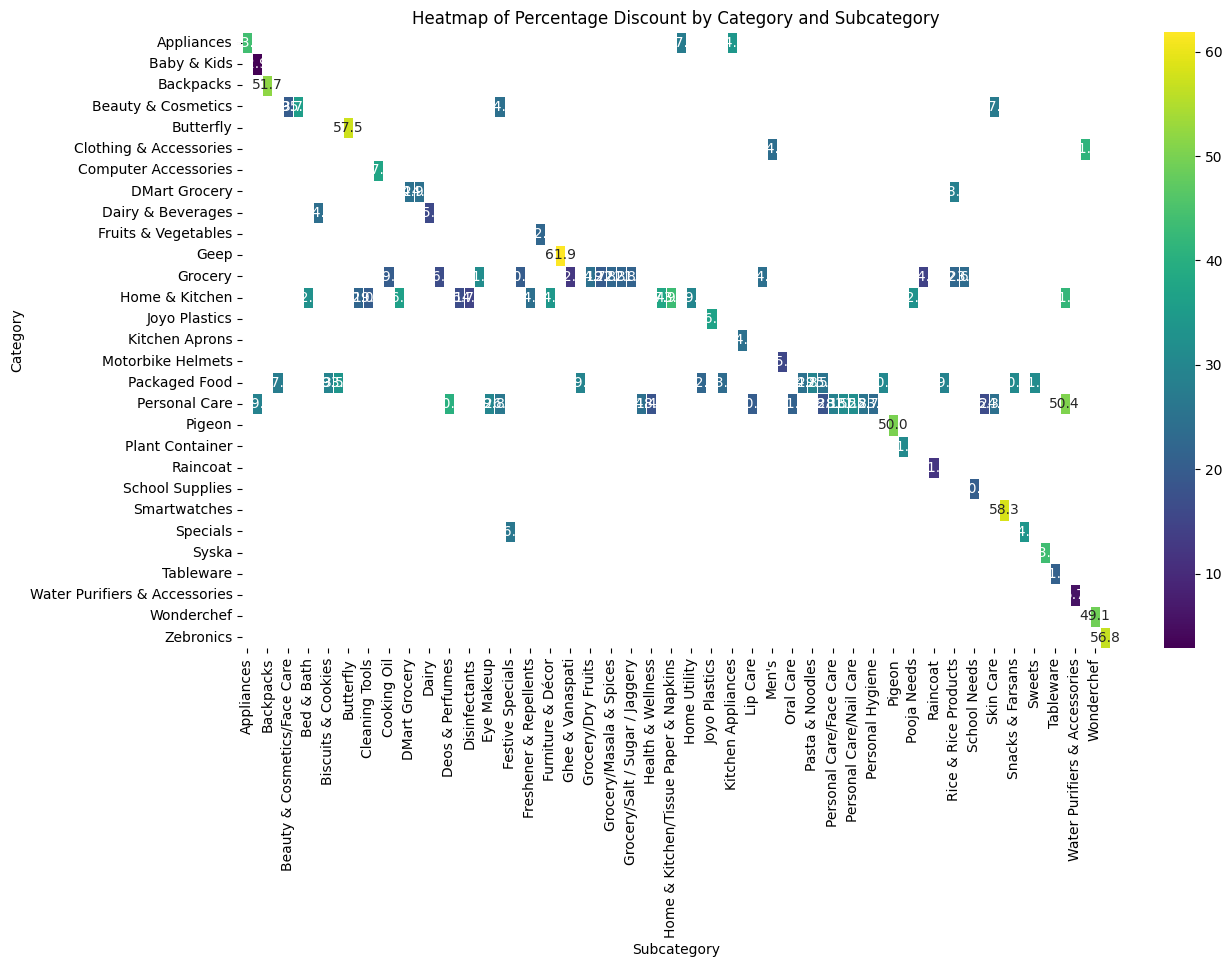

In [ ]:
# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = df.pivot_table(index='Category', columns='SubCategory', values='percentage discount', aggfunc='mean')

# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Percentage Discount by Category and Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Category')
plt.show()


Text(0.5, 1.0, 'Average Percentage Discount by Category')

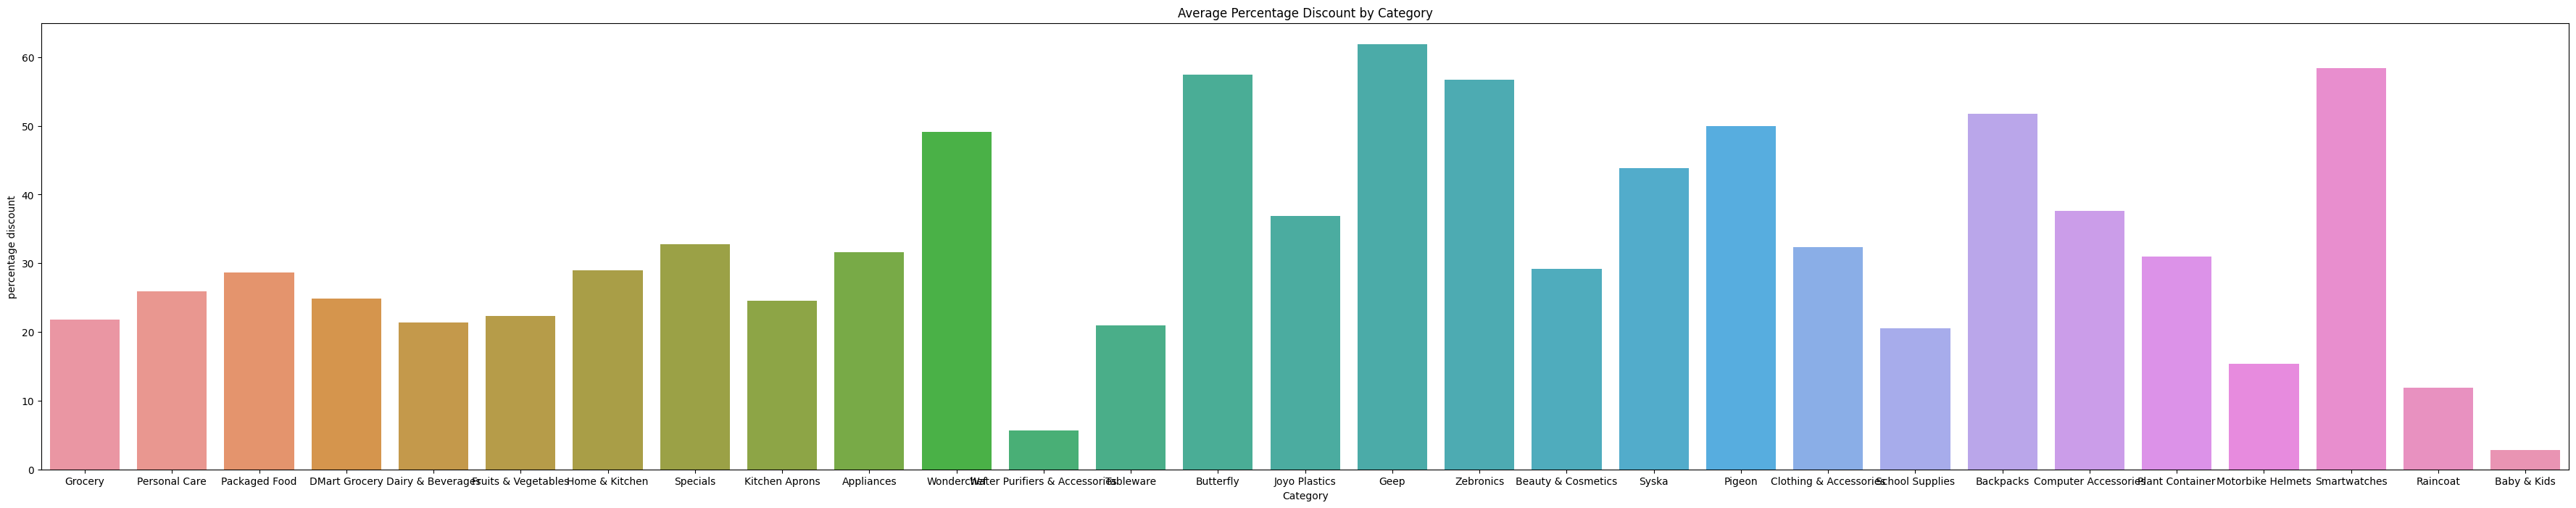

In [ ]:
plt.figure(figsize=(45, 8))
sns.barplot(x='Category', y='percentage discount', data=df, ci=None)
plt.title('Average Percentage Discount by Category')

Lets now deal with the null values
we saw the brand column has the most null values

In [ ]:
df['Brand'] = df['Brand'].fillna('local/unknown')

In [ ]:
df[df['Price'].isnull()==True]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,percentage discount
4323,Elle 18 Nail Pops Nail Colour - Shade 125,Elle 18,NaN,NaN,Personal Care,Personal Care/Nail Care,5 ml,NaN,Personal Care > Personal Care/Nail Care,NaN


In [ ]:
df['Price'] = df['Price'].fillna(df[df['SubCategory']=='Personal Care/Nail Care']['DiscountedPrice'].mean())

In [ ]:
df[df['Category'].isnull()==True]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,percentage discount
3180,Stainless Steel Idli Maker with Lid,Keyur Kitchenware,900.0,499.0,NaN,NaN,1 Unit,\n- Container Material : Stainless Steel\n- Ha...,NaN,44.555556
3243,Pigeon ESS Non-Stick Gift Set - Red,Pigeon,2895.0,1359.0,NaN,NaN,7 pcs,\n-Specifications :\n- Coating : 5 Layers Non-...,NaN,53.056995
3245,Wonderchef Milano Set - Red,Wonderchef,4200.0,1999.0,NaN,NaN,4 Pcs,\n- Adorn your kitchen with this beautiful Mil...,NaN,52.404762


In [ ]:
df['Category'] = df['Category'].fillna('Home & kitchen')
df['SubCategory'] = df['SubCategory'].fillna('kitchen appliances')

In [ ]:
df[df['Quantity'].isnull()==True]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,percentage discount
5047,Zeel MT212 Men's Raincoat - Navy Blue : Size XXL,Zeel,1199.0,1049.0,Raincoat,Raincoat,NaN,Specifications- Material : Fabric- Colour : Na...,Raincoat,12.510425


In [ ]:
df['Quantity'] = df['Quantity'].fillna('Size XXL')

In [ ]:
df['Description'] = df['Description'].fillna('No Desciption')

In [ ]:
df[df['percentage discount'].isnull()==True]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,percentage discount
2230,Kopiko Cappuccino Coffee Candies,Kopiko,0.000000,0.0,Packaged Food,Sweets,140 gm,OverviewKopiko candy is made from real coffee ...,Packaged Food > Sweets,NaN
4323,Elle 18 Nail Pops Nail Colour - Shade 125,Elle 18,64.594595,NaN,Personal Care,Personal Care/Nail Care,5 ml,No Desciption,Personal Care > Personal Care/Nail Care,NaN


In [ ]:
df['percentage discount'] = df['percentage discount'].fillna(0)

In [ ]:
df.isnull().sum()

Name                   1
Brand                  0
Price                  0
DiscountedPrice        1
Category               0
SubCategory            0
Quantity               0
Description            0
BreadCrumbs            3
percentage discount    0
dtype: int64

In [ ]:
df['Name'] = df['Name'].fillna('NA')
df['BreadCrumbs'] = df['BreadCrumbs'].fillna('NA')

In [ ]:
df['SubCategory'] = df['SubCategory'].apply(lambda x: x.split('/')[-1])

In [ ]:
df['BreadCrumbs'] = df['BreadCrumbs'].apply(lambda x: x.split('/')[-1]).apply(lambda x: x.split('>')[-1])

In [ ]:
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,percentage discount
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Dry Fruits,500 gm,India,Dry Fruits,27.050998
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Dry Fruits,100 gm,India,Dry Fruits,22.018349
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Dry Fruits,200 gm,India,Dry Fruits,13.366337
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Dry Fruits,41.736227
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Dry Fruits,57.456423


In [ ]:
df.tail()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,percentage discount
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1 Book,OverviewEach book has an index page with label...,School Needs,34.545455
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1 Book,OverviewStrong & sturdy case binding. Easy to ...,School Needs,18.823529
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1 Book,OverviewAttractive colour and designs. Easy to...,School Needs,27.272727
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1 Book,OverviewDrawing book has attractive cover desi...,School Needs,34.545455
5188,Navneet Youva Canvas Board (10x12 Inches),Navneet,90.0,75.0,School Supplies,School Needs,1 U,OverviewCoated with a double layer of acrylic ...,School Needs,16.666667


we see subcategory and breadcrumbs are one and the same

In [ ]:
df.drop(['BreadCrumbs'], axis=1, inplace=True)

In [ ]:
df.describe()

,Price,DiscountedPrice,percentage discount
count,5189.000000,5188.000000,5189.000000
mean,343.976509,236.669719,26.377852
std,600.988683,387.198716,15.187097
min,0.000000,0.000000,0.000000
25%,85.000000,64.000000,14.137931
50%,175.000000,125.000000,22.271715
75%,345.000000,249.000000,35.555556
max,10990.000000,7999.000000,98.000000


we can see the maximum discount was of 98%!

In [ ]:
df[df['percentage discount']==98]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,percentage discount
2191,Naagin Indian Hot Sauce - Original,Naagin,50.0,1.0,Packaged Food,Gourmet Food,40 gm,While we work to ensure that the product infor...,98.0
2192,Naagin Indian Hot Sauce - Smoky Bhoot,Naagin,50.0,1.0,Packaged Food,Gourmet Food,40 gm,While we work to ensure that the product infor...,98.0
2193,Naagin Indian Hot Sauce - Kantha Bomb,Naagin,50.0,1.0,Packaged Food,Gourmet Food,40 gm,While we work to ensure that the product infor...,98.0


we see the food products of Brand Naagin were given the max discount in Dmart

Distribution of Price


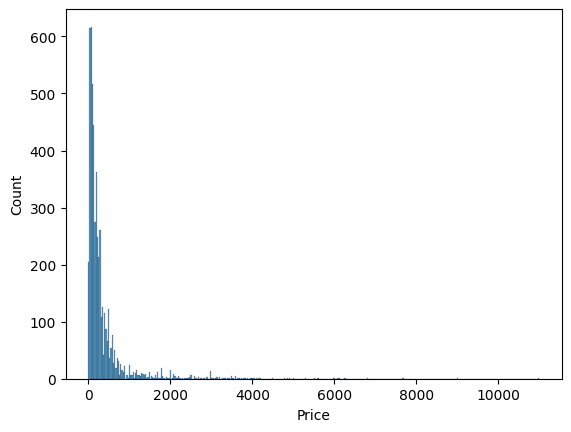

Distribution of DiscountedPrice


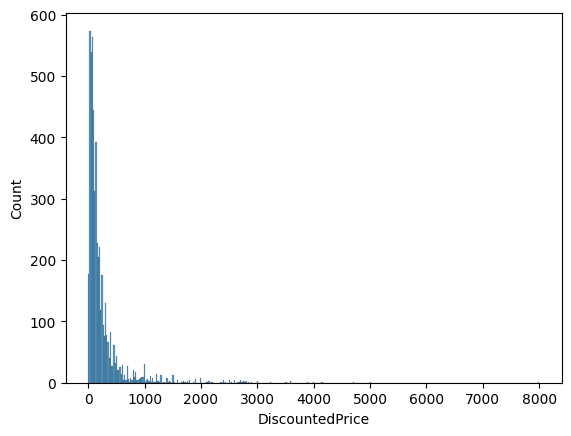

Distribution of percentage discount


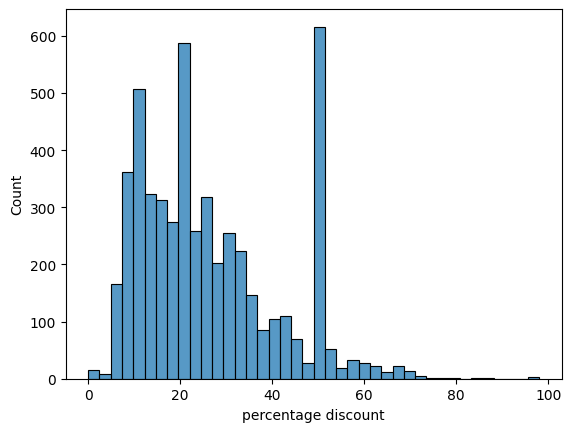

In [ ]:
cols = ['Price','DiscountedPrice','percentage discount']
for i in cols:
  print('Distribution of',i)
  sns.histplot(x=df[i])
  plt.show()

Observation:
All three Price,DicountedPrice and DiscountPercent values are mainly right skewed

Distribution of Price


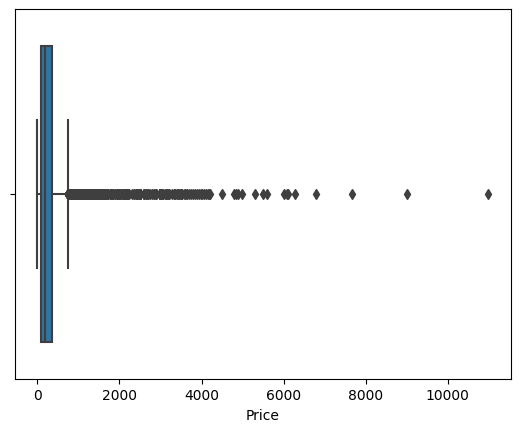

Distribution of DiscountedPrice


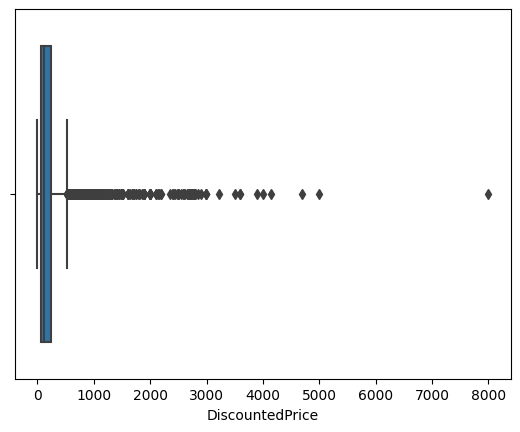

Distribution of percentage discount


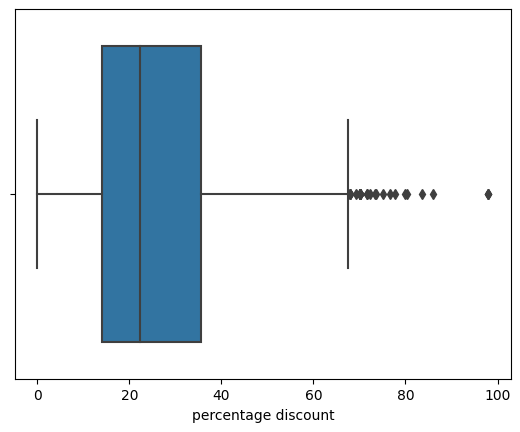

In [ ]:
for i in cols:
  print('Distribution of',i)
  sns.boxplot(x=df[i])
  plt.show()

as we are not doing this analysis in context of some machine learning problem we are free to keep those outliers.

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
text = "".join(d for d in df['Description'])
wc = WordCloud(width=1600, height=800, colormap='prism',background_color='white').generate(text)

(-0.5, 1599.5, 799.5, -0.5)

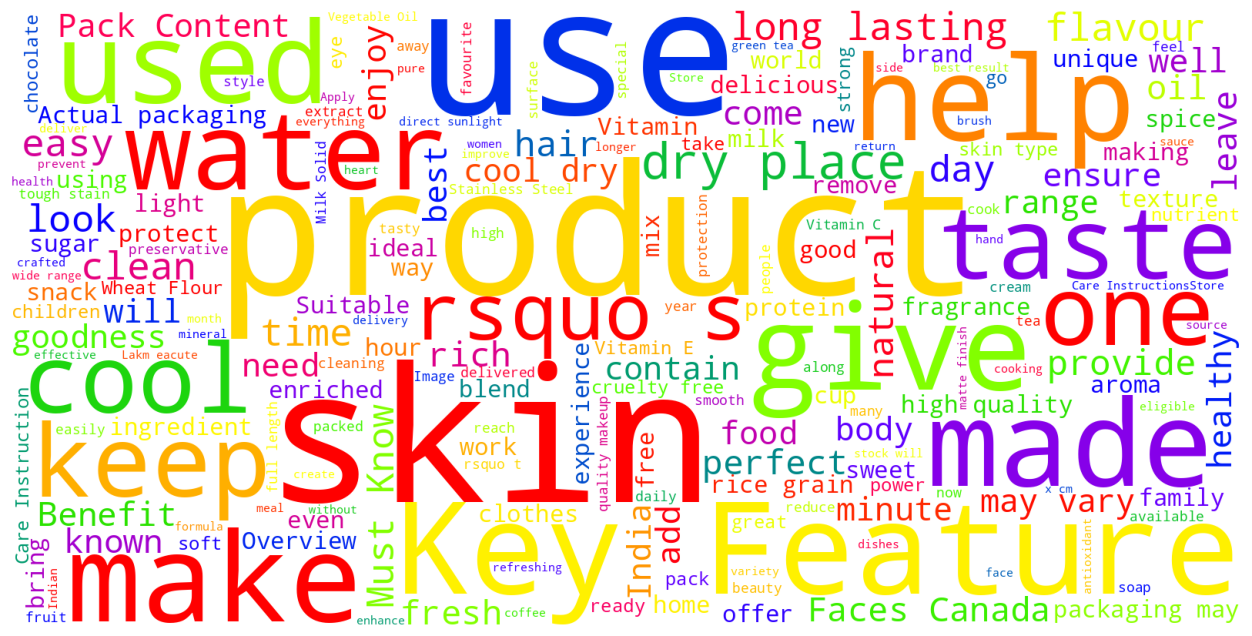

In [ ]:
plt.figure(figsize = (30,8))
plt.imshow(wc)
plt.axis("off")

In [ ]:
df.Category.value_counts()

Personal Care                    1234
Packaged Food                    1125
Home & Kitchen                    880
Grocery                           840
Dairy & Beverages                 429
Specials                          187
Clothing & Accessories             97
Fruits & Vegetables                78
School Supplies                    69
Appliances                         53
Beauty & Cosmetics                 46
Raincoat                           33
DMart Grocery                      31
Plant Container                    23
Tableware                          18
Backpacks                          13
Zebronics                           5
Motorbike Helmets                   4
Baby & Kids                         4
Geep                                3
Home & kitchen                      3
Kitchen Aprons                      3
Butterfly                           2
Computer Accessories                2
Joyo Plastics                       2
Syska                               1
Pigeon      

Personal care and packed food are available in abundance

In [ ]:
df.head(3)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,percentage discount
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Dry Fruits,500 gm,India,27.050998
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Dry Fruits,100 gm,India,22.018349
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Dry Fruits,200 gm,India,13.366337


In [ ]:
#lets figure out the number of brands in each category
df.groupby(['Category','Brand'])['Brand'].count()

Category                       Brand        
Appliances                     Ambrane           2
                               Bajaj             9
                               Borosil           1
                               Butterfly         1
                               Crompton          1
                                                ..
Syska                          Syska             1
Tableware                      local/unknown    18
Water Purifiers & Accessories  local/unknown     1
Wonderchef                     Wonderchef        1
Zebronics                      Zebronics         5
Name: Brand, Length: 966, dtype: int64

lets play with some categories and its subcategories

In [ ]:
clothing = df[df['Category'] == 'Clothing & Accessories']

In [ ]:
clothing.SubCategory.value_counts()

Men's      50
Women's    47
Name: SubCategory, dtype: int64

In [ ]:
px.pie(values=clothing.SubCategory.value_counts() ,names = clothing.SubCategory.value_counts().index, hole=0.5)

Almost same but more number of clothings are for men

In [ ]:
clothing.SubCategory.value_counts().index

Index(['Men's', 'Women's'], dtype='object')

In [ ]:
clothing.groupby(['SubCategory'])['percentage discount'].value_counts()

SubCategory  percentage discount
Men's        20.000000               6
             20.285714               6
             23.668639               4
             20.300752               3
             13.333333               2
             20.072993               2
             20.297030               2
             30.303030               2
             18.181818               1
             19.366197               1
             19.897959               1
             19.907407               1
             19.911504               1
             20.040080               1
             20.061728               1
             20.070423               1
             20.080321               1
             20.270270               1
             20.370370               1
             20.400000               1
             20.408163               1
             25.125628               1
             26.035503               1
             26.666667               1
             30.697674         

In [ ]:
clothing.groupby(['SubCategory'])['percentage discount'].mean()

SubCategory
Men's      24.006293
Women's    41.249400
Name: percentage discount, dtype: float64

As expected, the clothing for women have been given more discount as most business comes from the same

In [ ]:
cloth_brandName = clothing.groupby(['Brand','Category','SubCategory'])['percentage discount'].mean()
cloth_brandName

Brand          Category                SubCategory
Clio           Clothing & Accessories  Women's        29.259599
Dutch Harbor   Clothing & Accessories  Men's          23.959701
Feather Soft   Clothing & Accessories  Women's        53.149778
I & D          Clothing & Accessories  Men's          50.333333
In Shape       Clothing & Accessories  Women's        34.619883
Macho          Clothing & Accessories  Men's          20.061531
No Fuss        Clothing & Accessories  Men's          25.202713
                                       Women's        20.202020
Rupa           Clothing & Accessories  Men's          20.153637
local/unknown  Clothing & Accessories  Men's          33.888889
Name: percentage discount, dtype: float64

In [ ]:
cloth_brandName = clothing.groupby(['Brand','Category','SubCategory'])['percentage discount'].mean().reset_index()
cloth_brandName

,Brand,Category,SubCategory,percentage discount
0,Clio,Clothing & Accessories,Women's,29.259599
1,Dutch Harbor,Clothing & Accessories,Men's,23.959701
2,Feather Soft,Clothing & Accessories,Women's,53.149778
3,I & D,Clothing & Accessories,Men's,50.333333
4,In Shape,Clothing & Accessories,Women's,34.619883
5,Macho,Clothing & Accessories,Men's,20.061531
6,No Fuss,Clothing & Accessories,Men's,25.202713
7,No Fuss,Clothing & Accessories,Women's,20.202020
8,Rupa,Clothing & Accessories,Men's,20.153637
9,local/unknown,Clothing & Accessories,Men's,33.888889
